In [26]:
python_version() ## checking the current python version

'3.5.6'

In [59]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
from platform import python_version
import ipywidgets as widgets
import sys
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Testing the openCV model on video (multiple frames per second)

In [30]:
video = cv2.VideoCapture(0) ##Captures from webcam

a = 1 ## counter for number of frames processed by the model
model = cv2.CascadeClassifier("../model/haarcascade_frontalface_default.xml") ## importing the openCV model
while True:
    a = a+1
    check,frame = video.read()
    camera_face = model.detectMultiScale(frame,scaleFactor=1.05,minNeighbors=5)
    #for x,y,w,h in camera_face:
    #   my_face = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),3)

    #cv2.imshow('Capturing',my_face)
    if len(camera_face) > 0:
        print("True")
    else:
        print("False")
    key = cv2.waitKey(1)

    if key == ord('q'):
        break
video.release()
cv2.destroyAllWindows

<function destroyAllWindows>

## Image Formatting

In [56]:
IMG_SIZE = 160 # All images will be resized to 160x160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

## The first iteration

(160, 160, 3)


AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute '__array_interface__'

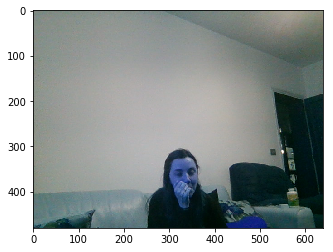

In [67]:
#################################
## Open CV model
#################################
##Capturing the video feed from the camera
video = cv2.VideoCapture(0)
##importing the frontal face model
model = cv2.CascadeClassifier("../model/haarcascade_frontalface_default.xml")
##reading from the video camera
check,frame = video.read()
##Searching for faces using the neural network
camera_face = model.detectMultiScale(frame,scaleFactor=1.05,minNeighbors=5)
if len(camera_face)>0:
    plt.imshow(frame)
##Switching off Video Camera and closinng any possible open windows
video.release()
cv2.destroyAllWindows
##################################
## Tensorflow model
##################################
##Create the keras model to be trained here (as of yet I am honestly unsure of what purpose this is going to serve)
keras_model = tf.keras
## Set all images to the shape below
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)
# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,include_top=False,weights='imagenet')
##format the frame using the function specified
new_frame,new_label = format_example(frame,"Ahmad")
print(new_frame.shape)
##Convert the image for feature extraction (removes error [4,2])
converted_frame = Image.fromarray(new_frame)
converted_frame = converted_frame.convert('RGB')
##Use the mobileNet CNN to extract the features from the frame
frame_feat= base_model(new_frame)
##
print(frame_feat.shape)